<a href="https://colab.research.google.com/github/besherh/Machine-Learning-Course/blob/master/EnsembleLearning/RandomForests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finding important features
Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.




#Random Forests vs Decision Trees
Random forests is a set of multiple decision trees.
Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
Decision trees are computationally faster.
Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.



#Building a Classifier using Scikit-learn
You will be building a model on the iris flower dataset, which is a very famous classification set. It comprises the sepal length, sepal width, petal length, petal width, and type of flowers. There are three species or classes: setosa, versicolor, and virginia. You will build a model to classify the type of flower. The dataset is available in the scikit-learn library or you can download it from the UCI Machine Learning Repository.

Start by importing the datasets library from scikit-learn, and load the iris dataset with load_iris().



In [1]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
iris = datasets.load_iris()


You can print the target and feature names, to make sure you have the right dataset, as such:



In [2]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)


['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


It's a good idea to always explore your data a bit, so you know what you're working with. Here, you can see the first five rows of the dataset are printed, as well as the target variable for the whole dataset.



In [3]:
# print the iris data (top 5 records)
print(iris.data[0:5])

# print the iris labels (0:setosa, 1:versicolor, 2:virginica)
print(iris.target)


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Here, you can create a DataFrame of the iris dataset the following way.



In [4]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


First, you separate the columns into dependent and independent variables (or features and labels). Then you split those variables into a training and test set.



In [5]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


After splitting, you will train the model on the training set and perform predictions on the test set.



In [6]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


After training, check the accuracy using actual and predicted values.



In [7]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9555555555555556


You can also make a prediction for a single item, for example:

sepal length = 3
sepal width = 5
petal length = 4
petal width = 2
Now you can predict which type of flower it is.



In [8]:
clf.predict([[3, 5, 4, 2]])
#Here, 2 indicates the flower type Virginica.




array([2])

#Finding Important Features in Scikit-learn
Here, you are finding important features or selecting features in the IRIS dataset. In scikit-learn, you can perform this task in the following steps:

First, you need to create a random forests model.
Second, use the feature importance variable to see feature importance scores.
Third, visualize these scores using the seaborn library.


In [9]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp


petal width (cm)     0.447073
petal length (cm)    0.421407
sepal length (cm)    0.103941
sepal width (cm)     0.027580
dtype: float64

You can also visualize the feature importance. Visualizations are easy to understand and interpretable.

For visualization, you can use a combination of matplotlib and seaborn. Because seaborn is built on top of matplotlib, it offers a number of customized themes and provides additional plot types. Matplotlib is a superset of seaborn and both are equally important for good visualizations.



No handles with labels found to put in legend.


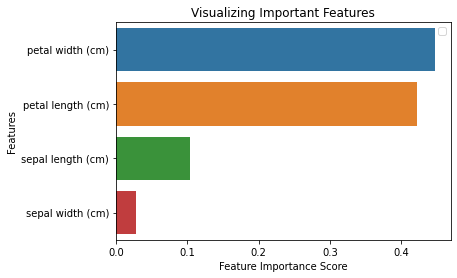

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


#Generating the Model on Selected Features
Here, you can remove the "sepal width" feature because it has very low importance, and select the 3 remaining features.




In [13]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data[['petal length', 'petal width','sepal length']]  # Removed feature "sepal length"
y=data['species']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test


After spliting, you will generate a model on the selected training set features, perform predictions on the selected test set features, and compare actual and predicted values.



In [14]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9523809523809523


You can see that after removing the least important features (sepal length), the accuracy increased. This is because you removed misleading data and noise, resulting in an increased accuracy. A lesser amount of features also reduces the training time.

